# Quantum Phase Estimation

In [1]:
# initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister,QuantumRegister
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram
%matplotlib inline

## Generalised Circuit

In [2]:
# function to apply Controlled Rotations during initialization
def controlledRotations(circuit, n, angle):
    repetitions = 1
    for counting_qubit in range(n - 1):
        for i in range(repetitions):
            circuit.cp(angle, counting_qubit, n - 1)
        repetitions *= 2   

In [3]:
# function to apply inverse QFT
def inverse_qft(circuit, n):
    for qubit in range(n // 2):
        circuit.swap(qubit, n - 1 - qubit)
    for j in range(n):
        for m in range(j):
            circuit.cp(-math.pi/float(2**(j - m)), m, j)
        circuit.h(j)    

#### Example for n = 6

##### Using Simulator

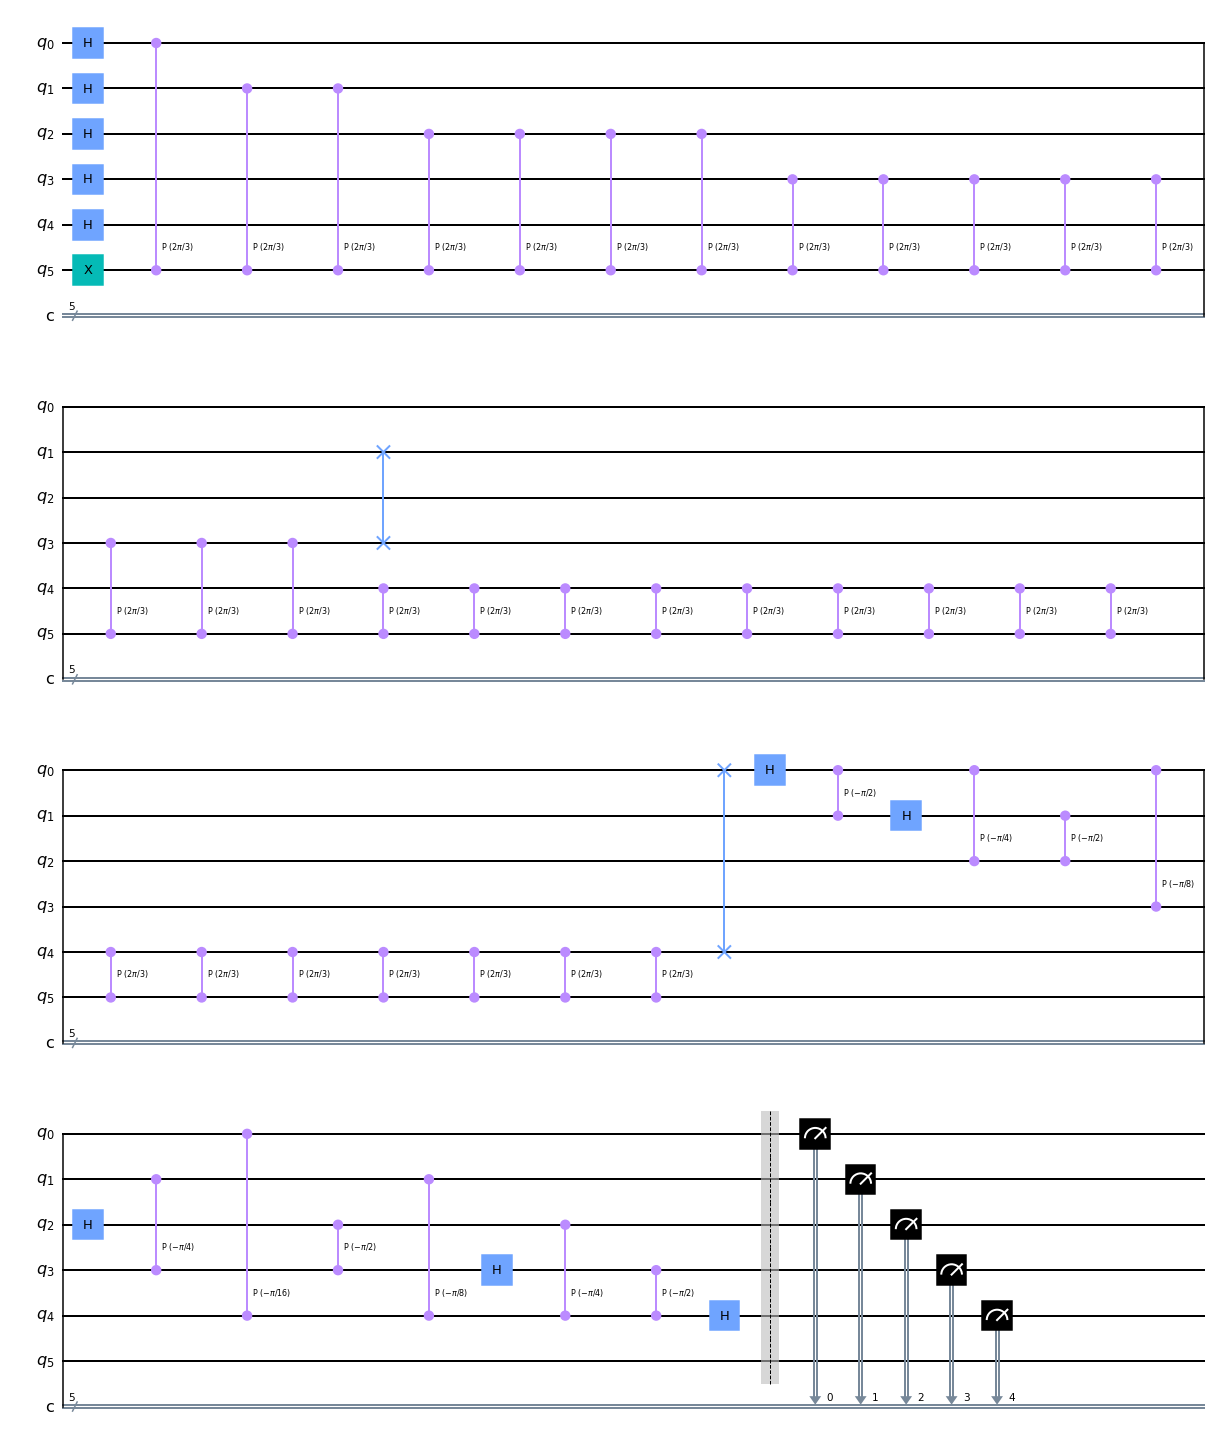

In [4]:
# Create and set up circuit:
n = 6
qpe = QuantumCircuit(n, n - 1)

# Apply H-Gates to counting qubits:
for qubit in range(n - 1):
    qpe.h(qubit)
    
# Preparing our eigenstate |psi>:
qpe.x(n - 1)

# Do the controlled-U operations:
angle = 2 * math.pi/3
controlledRotations(qpe, n, angle)

# Apply inverse QFT:
inverse_qft(qpe,n - 1)

# Measure:
qpe.barrier()
for n in range(5):
    qpe.measure(n, n)
qpe.draw(output = 'mpl')

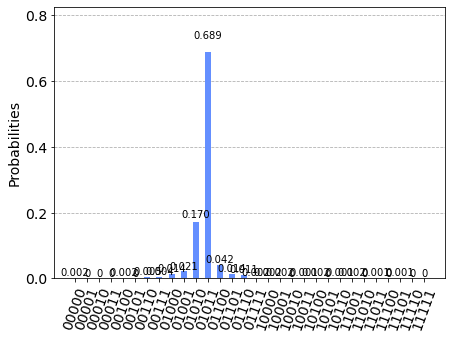

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')
job = execute(qpe, qasm_sim, shots = 2048)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

The two most likely measured results are 01010(decimal: 10) and 01011(decimal: 11). Measuring these two will give us the value of phase $\theta$:
         $\theta$ = 11/2^5 = 0.344 or 10/2^5 = 0.313.
These two results are differ from 1/3 by 3% and 6%. So we can observe that the number of counting bits increase, precison gets better.         


##### Real Quantum Computer
We'll do it for n = 4 to do it fast because for greater n it will involve large errors.

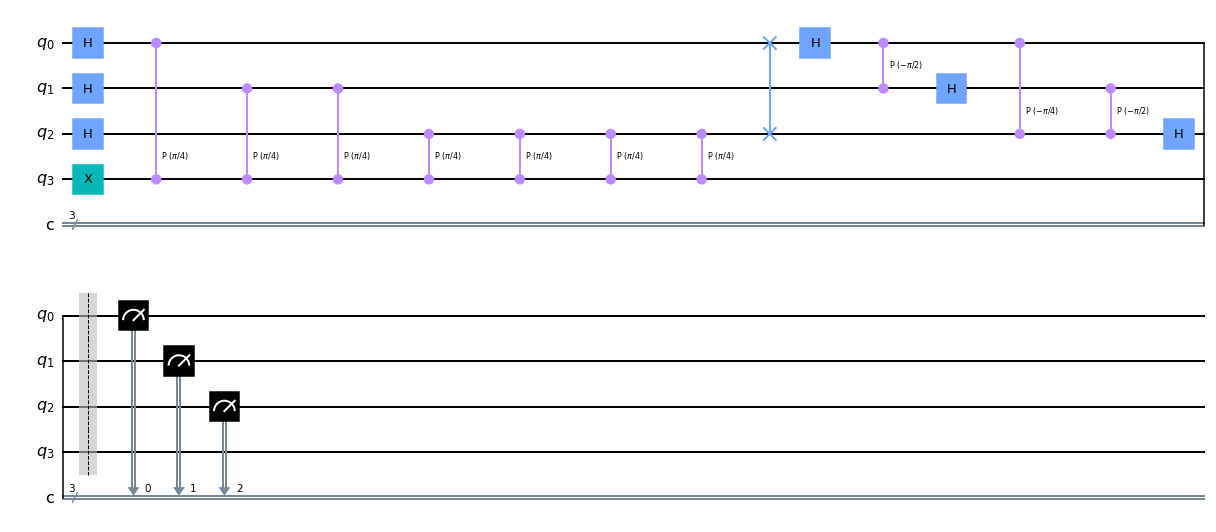

In [6]:
# Create and set up circuit:
n2 = 4
qpe2 = QuantumCircuit(n2, n2 - 1)

# Apply H-Gates to counting qubits:
for qubit in range(n2 - 1):
    qpe2.h(qubit)
    
# Preparing our eigenstate |psi>:
qpe2.x(n2 - 1)

# Do the controlled-U operations:
angle = math.pi/4
controlledRotations(qpe2, n2, angle)

# Apply inverse QFT:
inverse_qft(qpe2,n2 - 1)

# Measure:
qpe2.barrier()
for i in range(n2 - 1):
    qpe2.measure(i, i)
qpe2.draw(output = 'mpl')

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider('ibm-q')
santiago = provider.get_backend('ibmq_lima')
job = execute(qpe2, backend = santiago, shots = 2048)
job_monitor(job)

Job Status: job has successfully run


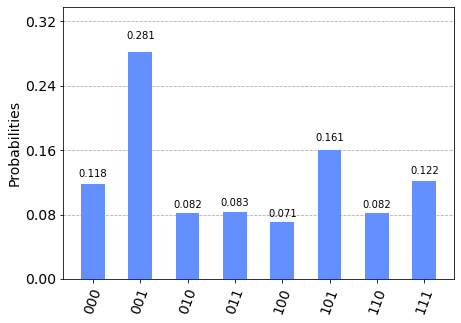

In [13]:
results = job.result()
ans = results.get_counts()
plot_histogram(ans)

We can hopefully see that the most likely result is 001 which is the result we would expect from the simulator. Unlike the simulator, there is a probability of measuring something other than 001, this is due to noise and gate errors in the quantum computer.